# Importing the libraries and the data

In [ ]:
import pandas as pd # Pandas (version : 1.1.5) 
import numpy as np # Numpy (version : 1.19.2)
import matplotlib.pyplot as plt # Matplotlib (version :  3.3.2)
from sklearn.cluster import KMeans # Scikit Learn (version : 0.23.2)
import seaborn as sns # Seaborn (version : 0.11.1)
plt.style.use('seaborn')

In [ ]:
data = pd.read_csv('/content/Iris.csv')

In [ ]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


# Viewing and Describing data

In [ ]:
data.shape

(150, 6)

In [ ]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [ ]:
for i,col in enumerate(data.columns):
    print(f'Column number {1+i} is {col}')

Column number 1 is Id
Column number 2 is SepalLengthCm
Column number 3 is SepalWidthCm
Column number 4 is PetalLengthCm
Column number 5 is PetalWidthCm
Column number 6 is Species


In [ ]:
data.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
data.isnull()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
145,False,False,False,False,False,False
146,False,False,False,False,False,False
147,False,False,False,False,False,False
148,False,False,False,False,False,False


In [ ]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
data.drop('Id', axis=1, inplace=True)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Data Modelling

In [ ]:
data.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
data['Species'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

In [ ]:
target_data = data.iloc[:,4]
target_data.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [ ]:
clustering_data = data.iloc[:,[0,1,2,3]]
clustering_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


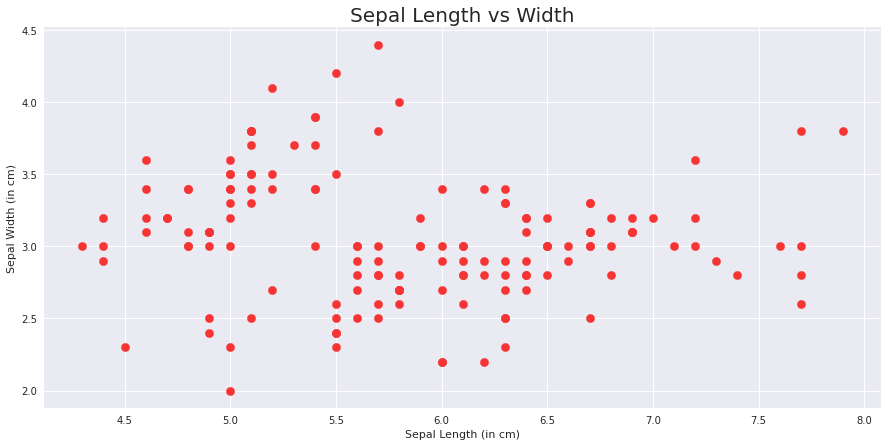

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
sns.set(font_scale=1.5)
ax = sns.scatterplot(x=data['SepalLengthCm'],y=data['SepalWidthCm'], s=70, color='#f73434', edgecolor='#f73434', linewidth=0.3)
ax.set_ylabel('Sepal Width (in cm)')
ax.set_xlabel('Sepal Length (in cm)')
plt.title('Sepal Length vs Width', fontsize = 20)
plt.show()

In [ ]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    km = KMeans(i)
    km.fit(clustering_data)
    wcss.append(km.inertia_)
np.array(wcss)

array([680.8244    , 152.36870648,  78.94084143,  57.31787321,
        46.53558205,  38.96478785,  34.1967911 ,  30.48916087,
        27.83959114,  26.5789643 ])

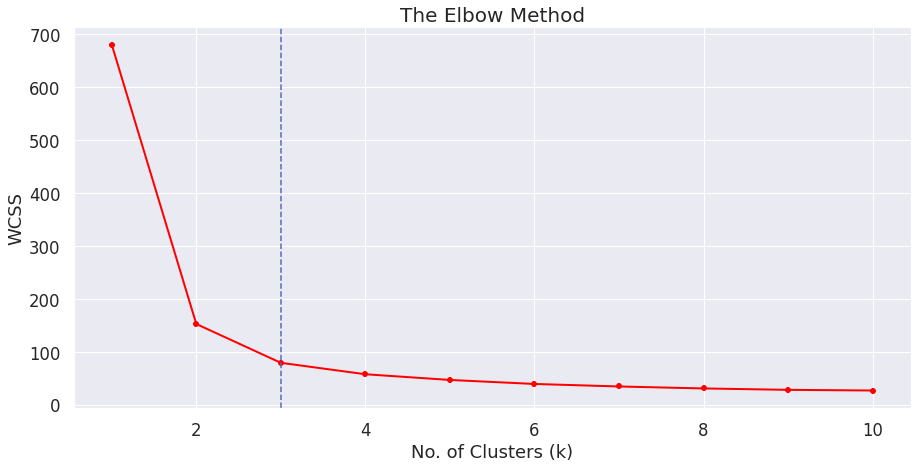

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
ax = plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.axvline(x=3, ls='--')
plt.ylabel('WCSS')
plt.xlabel('No. of Clusters (k)')
plt.title('The Elbow Method', fontsize = 20)
plt.show()

# Clustering

In [ ]:
from sklearn.cluster import KMeans

kms = KMeans(n_clusters=3, init='k-means++')
kms.fit(clustering_data)

KMeans(n_clusters=3)

In [ ]:
clusters = clustering_data.copy()
clusters['Cluster_Prediction'] = kms.fit_predict(clustering_data)
clusters.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Cluster_Prediction
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [ ]:
kms.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

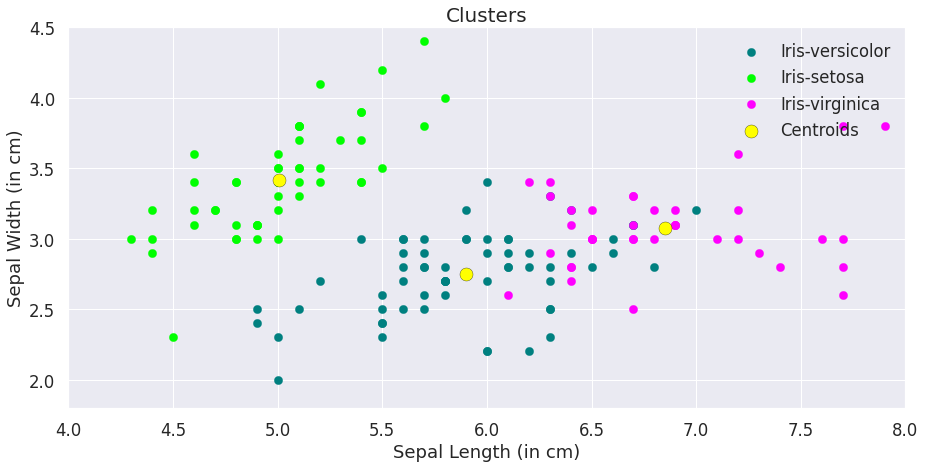

In [ ]:
fig, ax = plt.subplots(figsize=(15,7)) 
plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 0]['SepalLengthCm'],
            y=clusters[clusters['Cluster_Prediction'] == 0]['SepalWidthCm'],
            s=70,edgecolor='teal', linewidth=0.3, c='teal', label='Iris-versicolor')


plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 1]['SepalLengthCm'],
            y=clusters[clusters['Cluster_Prediction'] == 1]['SepalWidthCm'],
            s=70,edgecolor='lime', linewidth=0.3, c='lime', label='Iris-setosa')


plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 2]['SepalLengthCm'],
            y=clusters[clusters['Cluster_Prediction'] == 2]['SepalWidthCm'],
            s=70,edgecolor='magenta', linewidth=0.3, c='magenta', label='Iris-virginica')

plt.scatter(x=kms.cluster_centers_[:, 0], y=kms.cluster_centers_[:, 1], s = 170, c = 'yellow', label = 'Centroids',edgecolor='black', linewidth=0.3)
plt.legend(loc='upper right')
plt.xlim(4,8)
plt.ylim(1.8,4.5)
ax.set_ylabel('Sepal Width (in cm)')
ax.set_xlabel('Sepal Length (in cm)')
plt.title('Clusters', fontsize = 20)
plt.show()

# Gausian Mixture Models Clustering

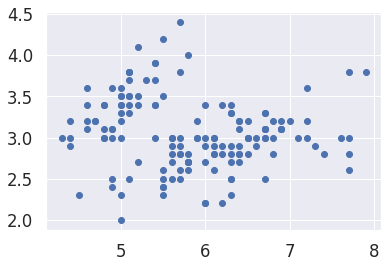

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame
from sklearn import datasets
from sklearn.mixture import GaussianMixture
 
# load the iris dataset
iris = datasets.load_iris()
 
# select first two columns
X = iris.data[:, :2]
 
# turn it into a dataframe
d = pd.DataFrame(X)
 
# plot the data
plt.scatter(d[0], d[1])

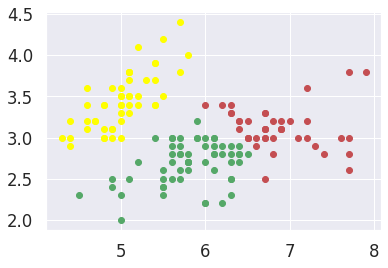

In [ ]:
gmm = GaussianMixture(n_components = 3)
 
# Fit the GMM model for the dataset
# which expresses the dataset as a
# mixture of 3 Gaussian Distribution
gmm.fit(d)
 
# Assign a label to each sample
labels = gmm.predict(d)
d['labels']= labels
d0 = d[d['labels']== 0]
d1 = d[d['labels']== 1]
d2 = d[d['labels']== 2]
 
# plot three clusters in same plot
plt.scatter(d0[0], d0[1], c ='r')
plt.scatter(d1[0], d1[1], c ='yellow')
plt.scatter(d2[0], d2[1], c ='g')

In [ ]:
# Try GMMs using different types of covariances in 2d: petal length vs petal width
estimators = dict((cov_type, GaussianMixture(n_components=3,
                   covariance_type=cov_type, max_iter=20, random_state=0))
                  for cov_type in ['spherical', 'diag', 'tied', 'full'])
for (name,estimator) in estimators.items():
    estimator.fit(iris.data[:,2:4]) ## fits a mixture model using EM

In [ ]:
from matplotlib.patches import Ellipse
def plot_cov_ellipse(cov, pos, col='b', nstd=2, ax=None, **kwargs):
    def eigsorted(cov):
        vals, vecs = np.linalg.eigh(cov)
        order = vals.argsort()[::-1]
        return vals[order], vecs[:,order]
    if ax is None:
        ax = plt.gca()
    vals, vecs = eigsorted(cov)
    theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))
    # Width and height are "full" widths, not radius
    width, height = 2 * nstd * np.sqrt(vals)
    ellip = Ellipse(xy=pos, width=width, height=height, angle=theta, color=col, alpha=0.2,**kwargs)
    ax.add_artist(ellip)
    return ellip

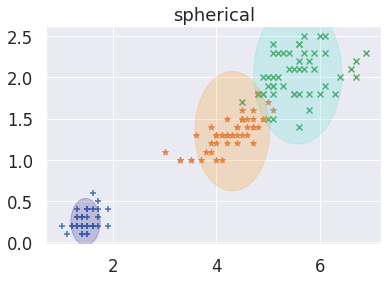

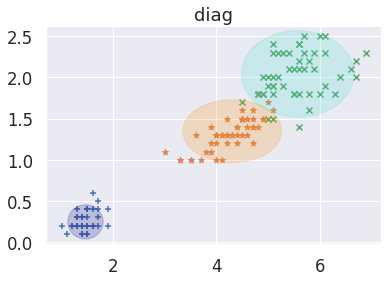

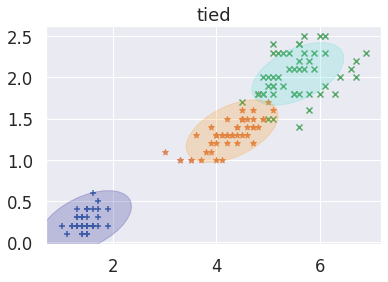

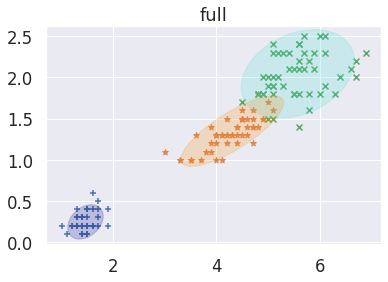

In [ ]:
for (name,gmm) in estimators.items():
    for n, color in enumerate(colors):
        data = iris.data[iris.target == n]
        plt.scatter(data[:, 2], data[:, 3], marker=markers[n])
        if gmm.covariance_type == 'full':
            cov = gmm.covariances_[n]
        elif gmm.covariance_type == 'tied':
            cov = gmm.covariances_
        elif gmm.covariance_type == 'diag':
            cov = np.diag(gmm.covariances_[n])
        elif gmm.covariance_type == 'spherical':
            cov = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        #print(cov)
        pos = estimator.means_[n]
        #print(pos)
        plot_cov_ellipse(cov,pos,col=color)
    plt.title(name)
    plt.show()